In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature
import knn
import d_knn
import randomforest
import gbrt
from project import plt_ant_feat

C:\ProgramData\Anaconda3\envs\csci5622\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\envs\csci5622\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.21.3 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\envs\csci5622\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything

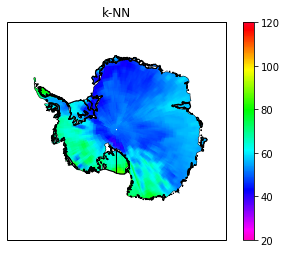

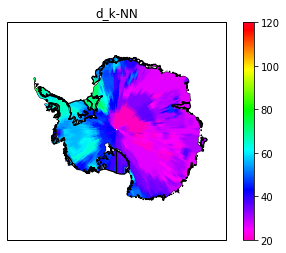

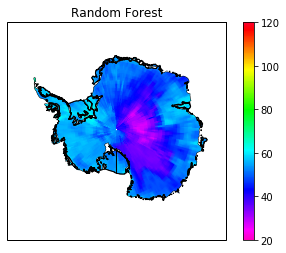

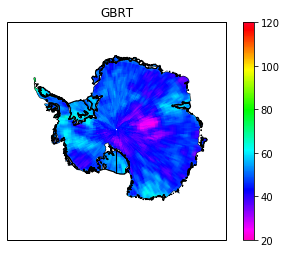

In [2]:
ant_data = pd.read_csv('data/ant_features.csv')

pred_dict = {}

models = [knn, d_knn, randomforest, gbrt]

for model in models:
    pred_dict[model.key] = model.pred(ant_data)
    plt_ant_feat(pred_dict[model.key], title=model.key)

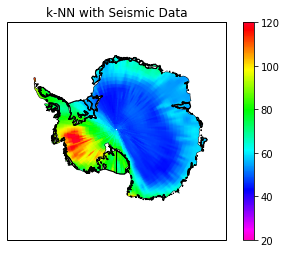

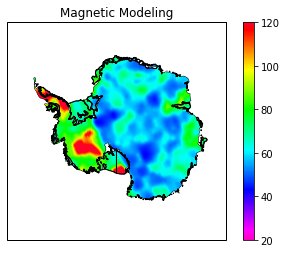

In [3]:
# Maps from the literature

# Shapiro
shapiro_data = pd.read_csv('data/shapiro_processed.csv')
plt_ant_feat(shapiro_data['GHF'].values.ravel(), title='k-NN with Seismic Data')

#Martos
x, y, z = np.loadtxt('data/Antarctic_GHF.xyz', unpack=True)
plt_ant_feat(z, x=x, y=y, ups=True, title='Magnetic Modeling')

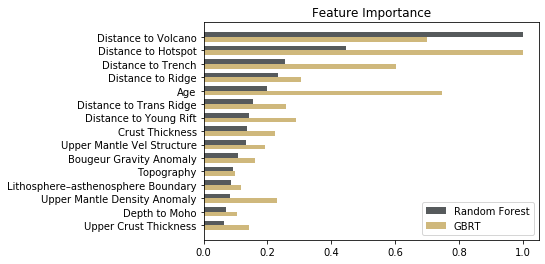

In [4]:
# Feature Importance
label_map = {'age':'Age',
             'bougeur_gravity_anomaly':'Bougeur Gravity Anomaly',
             'd_2_hotspot':'Distance to Hotspot',
             'd_2_ridge':'Distance to Ridge',
             'd_2_trans_ridge':'Distance to Trans Ridge',
             'd_2_trench':'Distance to Trench',
             'd_2_volcano':'Distance to Volcano',
             'd_2_young_rift':'Distance to Young Rift',
             'depth_to_moho':'Depth to Moho',
             'lithos_asthenos_bdry':'Lithosphere–asthenosphere Boundary',
             'magnetic_anomaly':'Magnetic Anomaly',
             'thickness_crust':'Crust Thickness',
             'thickness_middle_crust':'Middle Crust Thickness',
             'thickness_upper_crust':'Upper Crust Thickness',
             'topography':'Topography',
             'upper_mantle_density_anomaly':'Upper Mantle Density Anomaly',
             'upper_mantle_vel_structure':'Upper Mantle Vel Structure'}

max_features = 15

labels, rf_imp = randomforest.feature_importances()
labels, gbrt_imp = gbrt.feature_importances(ant_data)
sort_i = np.argsort(rf_imp)
labels = labels[sort_i][-max_features:]
rf_imp = rf_imp[sort_i][-max_features:]
gbrt_imp = gbrt_imp[sort_i][-max_features:]

y = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
plt.title('Feature Importance')
plt.barh(y + width/2, rf_imp, width, label='Random Forest', color='#565A5C')
plt.barh(y - width/2, gbrt_imp, width, label='GBRT', color='#CFB87C')
ax.set_yticks(y)
ax.set_yticklabels([label_map[x] for x in labels])
ax.legend()

#plt.savefig('feature_importance.pdf', bbox_inches="tight")